
# Agent 智能体

## 介绍

- 能够自主规划、决策、执行任务的组件
  - 没有 Agent，LLM 只能基于自身训练数据回答问题
  - 有 Agent，LLM 能够思考任务步骤、选择合适工具、调用工具、根据结果调整策略

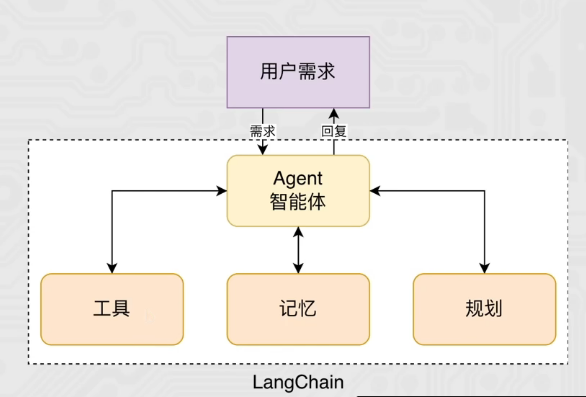

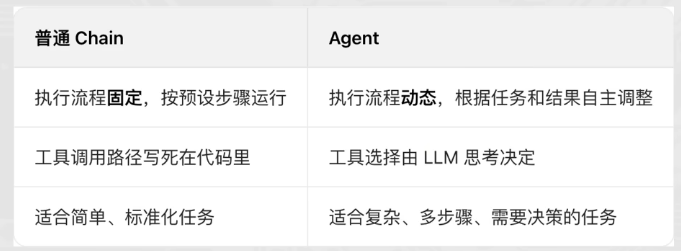

In [1]:
from langchain.agents import create_agent
from langchain_community.chat_models.tongyi import ChatTongyi
from langchain_core.tools import tool

In [2]:
@tool(description="查询天气")
def get_weather() -> str:
    return "晴天"

In [3]:
agent = create_agent(
    model=ChatTongyi(model="qwen3-max"),  # 智能体的大脑LLM
    tools=[get_weather],  # 向智能体提供工具列表
    system_prompt="你是一个聊天助手，可以回答用户问题。",
)

In [4]:
res = agent.invoke(
    {"messages": [
        {"role": "user", "content": "明天深圳的天气如何？"},
    ]}
)

for msg in res["messages"]:
    print(type(msg).__name__, msg.content)

HumanMessage 明天深圳的天气如何？
AIMessage 
ToolMessage 晴天
AIMessage 明天深圳的天气是晴天。记得做好防晒措施，祝你有个愉快的一天！
